In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('../data/ground_truth_dataset.csv')

,image_num,vote_1,vote_2,vote_3,vote_4,vote_5,vote_6,vote_7,vote_8,vote_9,vote_10
0,953417,0.000000,0.000000,0.000000,0.040323,0.258065,0.403226,0.185484,0.080645,0.024194,0.008065
1,953777,0.000000,0.023438,0.015625,0.023438,0.101562,0.312500,0.273438,0.164062,0.062500,0.023438
2,953756,0.000000,0.015625,0.023438,0.070312,0.273438,0.390625,0.156250,0.039062,0.015625,0.015625
3,954195,0.000000,0.008197,0.057377,0.213115,0.459016,0.188525,0.049180,0.008197,0.000000,0.016393
4,953903,0.000000,0.008065,0.032258,0.040323,0.266129,0.403226,0.137097,0.072581,0.024194,0.016129
...,...,...,...,...,...,...,...,...,...,...,...
255503,56938,0.003906,0.027344,0.066406,0.156250,0.328125,0.218750,0.121094,0.050781,0.023438,0.003906
255504,57304,0.003922,0.000000,0.031373,0.098039,0.196078,0.254902,0.215686,0.101961,0.070588,0.027451
255505,56711,0.000000,0.000000,0.032258,0.044355,0.104839,0.189516,0.193548,0.225806,0.120968,0.088710
255506,57303,0.000000,0.008065,0.076613,0.120968,0.302419,0.241935,0.120968,0.100806,0.020161,0.008065


In [11]:
df.describe()

,image_num,vote_1,vote_2,vote_3,vote_4,vote_5,vote_6,vote_7,vote_8,vote_9,vote_10
count,255508.000000,255508.000000,255508.000000,255508.000000,255508.000000,255508.000000,255508.000000,255508.000000,255508.000000,255508.000000,255508.000000
mean,464735.388767,0.012032,0.025467,0.063308,0.163686,0.292418,0.232428,0.117452,0.055914,0.023412,0.013883
std,296145.041873,0.025266,0.030492,0.051761,0.088040,0.084004,0.083331,0.067981,0.045236,0.025783,0.019255
min,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193992.750000,0.000000,0.006061,0.024510,0.092715,0.237209,0.175325,0.062500,0.021661,0.006098,0.003125
50%,456952.000000,0.005181,0.015544,0.048872,0.153846,0.296875,0.238095,0.108497,0.043668,0.015152,0.007874
75%,737671.500000,0.013333,0.033520,0.088235,0.226667,0.350877,0.292398,0.165323,0.078704,0.031818,0.017699
max,958297.000000,0.735849,0.302920,0.392405,0.541667,0.621795,0.527559,0.434109,0.330935,0.285714,0.384328


In [16]:
vote_cols = sorted(
    [c for c in df.columns if c.startswith("vote_")],
    key=lambda s: int(s.split("_")[1]))
assert vote_cols == [f"vote_{i}" for i in range(1, 11)], vote_cols

print("rows:", len(df))
print("unique image num:", df["image_num"].nunique())
print("duplicate image num rows:", len(df)- df["image_num"].nunique())
df.head()


rows: 255508
unique image num: 255508
duplicate image num rows: 0


,image_num,vote_1,vote_2,vote_3,vote_4,vote_5,vote_6,vote_7,vote_8,vote_9,vote_10
0,953417,0.0,0.000000,0.000000,0.040323,0.258065,0.403226,0.185484,0.080645,0.024194,0.008065
1,953777,0.0,0.023438,0.015625,0.023438,0.101562,0.312500,0.273438,0.164062,0.062500,0.023438
2,953756,0.0,0.015625,0.023438,0.070312,0.273438,0.390625,0.156250,0.039062,0.015625,0.015625
3,954195,0.0,0.008197,0.057377,0.213115,0.459016,0.188525,0.049180,0.008197,0.000000,0.016393
4,953903,0.0,0.008065,0.032258,0.040323,0.266129,0.403226,0.137097,0.072581,0.024194,0.016129


In [19]:
votes = df[vote_cols].to_numpy(dtype=float)

row_sum = votes.sum(axis=1)
min_vote = votes.min()
max_vote = votes.max()

print("row sum mean:", row_sum.mean())
print("row sum min max:", row_sum.min(), row_sum.max())
print("max:", np.max(np.abs(row_sum - 1)))
print("min vote value:", min_vote, "max vote value:", max_vote)

bad = np.where((np.abs(row_sum - 1) > 1e-3) | (votes < -1e-9).any(axis=1) | np.isnan(votes).any(axis=1))[0]
print("sus rows:", len(bad))
if len(bad) > 0: display(df.iloc[bad[:10]][["image_num"] + vote_cols].assign(row_sum=row_sum[bad[:10]]))


row sum mean: 0.9999999999999999
row sum min max: 0.999999999999999 1.0000000000000002
max: 9.992007221626409e-16
min vote value: 0.0 max vote value: 0.7358490566037735
sus rows: 0


,mean_score,std_score,entropy
count,255508.000000,255508.000000,255508.000000
mean,5.383302,1.429233,1.716611
std,0.731300,0.203284,0.145473
min,1.808989,0.766246,1.076831
1%,3.564918,1.010078,1.373563
5%,4.179788,1.113166,1.468987
10%,4.465206,1.175162,1.523997
25%,4.911215,1.287901,1.619043
50%,5.386647,1.419884,1.721677
75%,5.865627,1.557205,1.817322


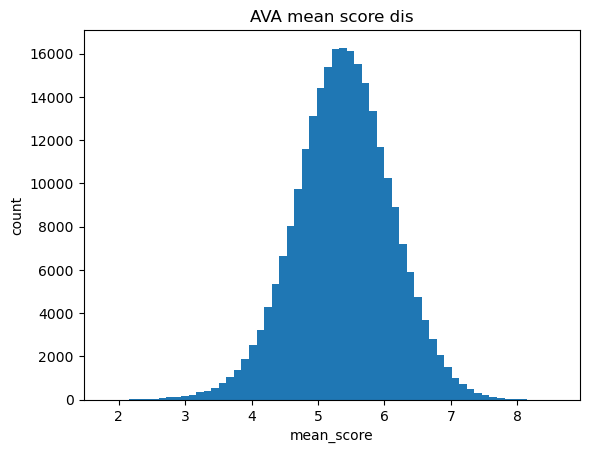

<Figure size 640x480 with 0 Axes>

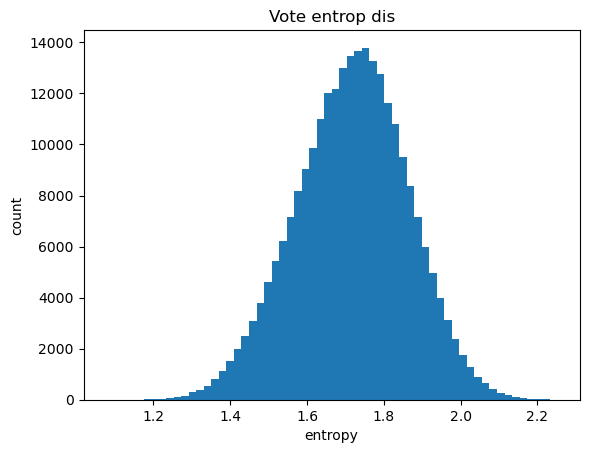

aesthetic rate @ threshold 5.0 : 0.7079347809070557


<Figure size 640x480 with 0 Axes>

In [25]:
scores = np.arange(1, 11, dtype=float)
mean_score = votes @ scores
second_moment = votes @ (scores**2)
var_score = second_moment - mean_score**2
std_score = np.sqrt(np.maximum(var_score, 0))

eps = 1e-12
entropy = -(votes * np.log(votes + eps)).sum(axis=1)

df_eda = df.copy()
df_eda["mean_score"] = mean_score
df_eda["std_score"] = std_score
df_eda["entropy"] = entropy

display(df_eda[["mean_score","std_score","entropy"]].describe(percentiles=[.01,.05,.1,.25,.5,.75,.9,.95,.99]))

plt.figure()
plt.hist(df_eda["mean_score"], bins=60)
plt.title("AVA mean score dis")
plt.xlabel("mean_score"); plt.ylabel("count")
plt.show()
plt.savefig("../figures/ava.png")

plt.figure()
plt.hist(df_eda["entropy"], bins=60)
plt.title("Vote entrop dis")
plt.xlabel("entropy"); plt.ylabel("count")
plt.show()
threshold = 5.0
df_eda["is_aesthetic"] = (df_eda["mean_score"] >= threshold).astype(int)
print("aesthetic rate @ threshold", threshold, ":", df_eda["is_aesthetic"].mean())

plt.savefig("../figures/ent.png")
plt.show()

